Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

Origin,Dest,avg_delay,avg_ArrDelay
HOU,ABQ,11.582,6.001
HOU,ATL,9.129,6.810
HOU,AUS,12.189,9.274
HOU,BHM,15.015,6.673
HOU,BKG,-3.202,-16.234
HOU,BNA,11.395,5.394


Origin,Dest,avg_delay,avg_ArrDelay
IAH,TPA,6.611,3.752
IAH,TUL,5.738,5.482
IAH,TUS,7.784,7.802
IAH,TYS,10.171,11.366
IAH,VPS,12.339,12.457
IAH,XNA,6.691,6.896


,Origin,Delay_type,Delay_time
293,IAH,avg_ArrDelay,3.752
294,IAH,avg_ArrDelay,5.482
295,IAH,avg_ArrDelay,7.802
296,IAH,avg_ArrDelay,11.366
297,IAH,avg_ArrDelay,12.457
298,IAH,avg_ArrDelay,6.896


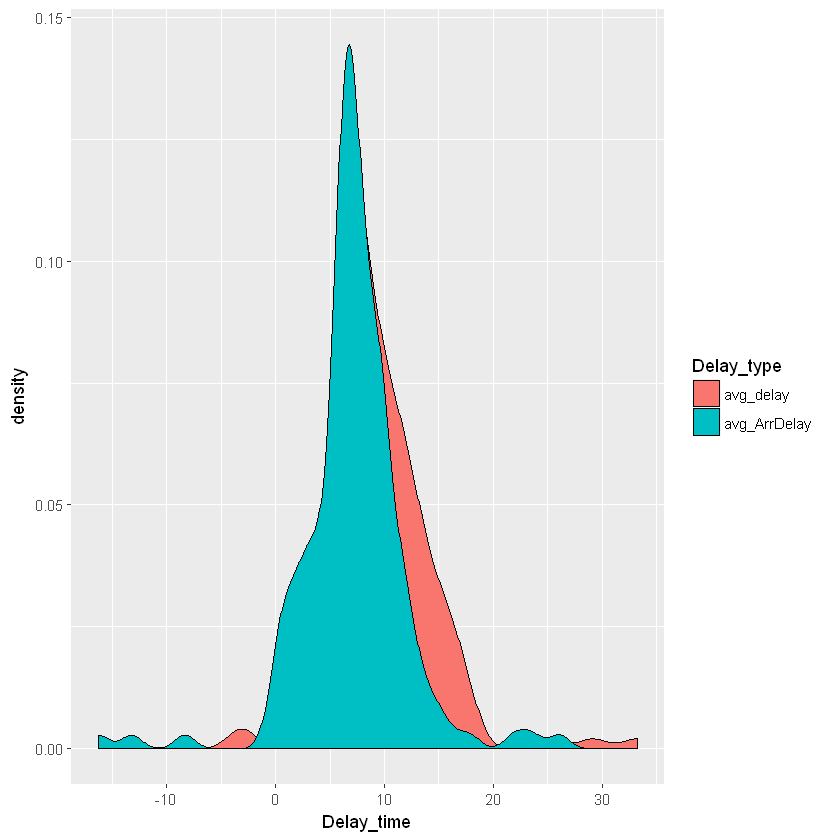

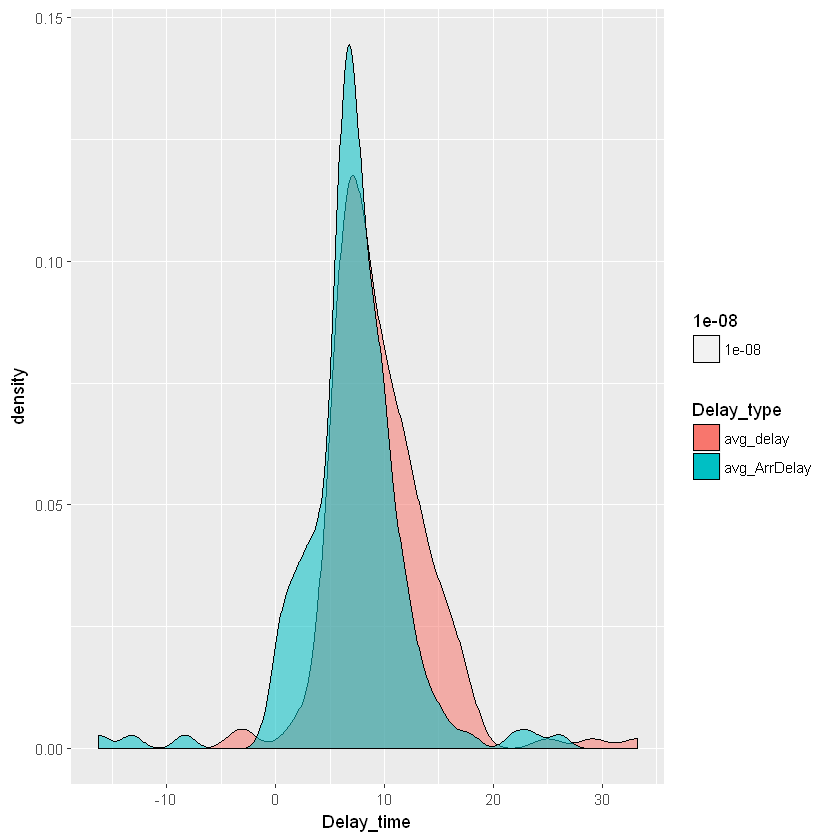

[1]  0  1 -8  3  5 -1 -1 -5 43 43 29 19 -2 -3 -1 -1 90  8 -4 67

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[13] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE

[1] 71417

[1] 227496

[1] 227496

[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [85]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

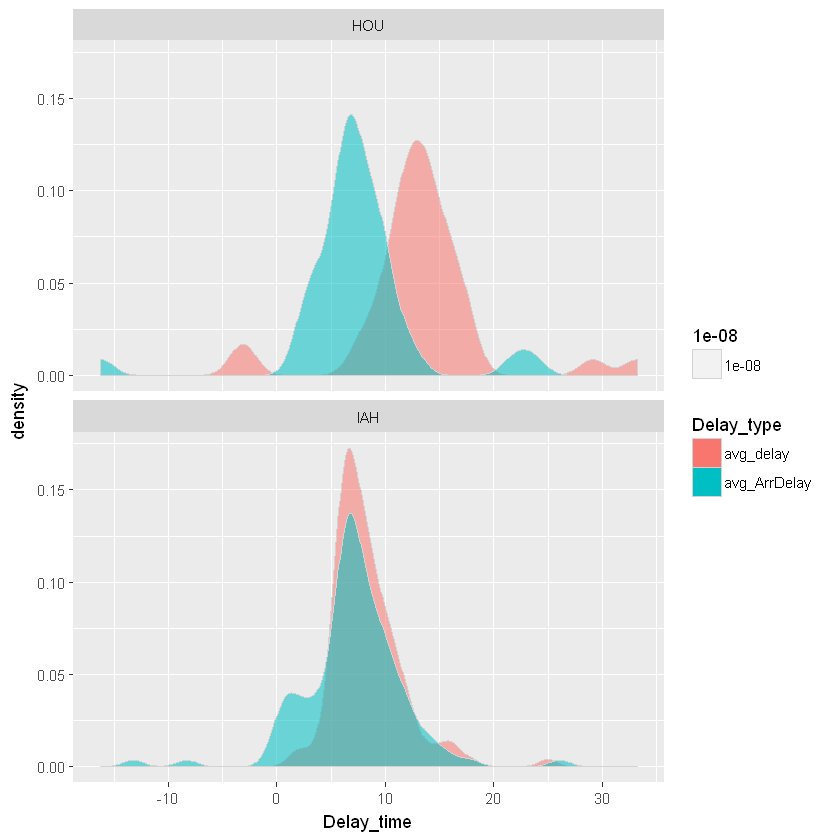

In [1]:

library(dplyr)
library(ggplot2)
library(reshape2)
data(hflights, package='hflights')

str(hflights)

flights.1 <- hflights %>% 
group_by(Origin, Dest) %>%
summarise(avg_delay = round(mean(DepDelay , na.rm = T), digit=3), 
          avg_ArrDelay = round(mean(ArrDelay, na.rm = T), digits=3))

head(flights.1)

flights.melt <- melt(flights.1, id=c("Origin"), 
                     measure=c("avg_delay","avg_ArrDelay"),
                     variable.name = "Delay_type",
                     value.name = "Delay_time",
                     na.rm = T)

tail(flights.1, 6)

tail(flights.melt)

ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type)) + geom_density()

ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density()

ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density(colour = "lightgray", size = 0.00000001) +
facet_wrap(~Origin, nrow = 2)

head(hflights$DepDelay, 20)
head(hflights$DepDelay > 5, 20)
sum(hflights$DepDelay > 5, na.rm = T)

length(hflights$DepDelay)
length(hflights$DepDelay > 5)

flights.2 <- hflights %>% 
group_by(Dest) %>%
summarise( num_DepDelay = sum(DepDelay > 5, na.rm = T))

flights.2$num_DepDelay >= 2000



In [2]:
flights.2 <- hflights %>% 
group_by(Dest) %>%
summarise( num_DepDelay = sum(DepDelay > 5, na.rm = T))

In [4]:
flights.2 <- flights.2[flights.2$num_DepDelay >= 2000,]

위의 결과를 바탕으로 목적지 공항, 월별 결항 횟수, 회황횟수, 운항 횟수를 구하시오.
- 운항 횟수는 결항과 회항을 제외할 것

In [5]:
head(flights.2)

Dest,num_DepDelay
ATL,2088
DAL,3458
DEN,2183
LAX,2727
MSY,2145
ORD,2158


In [6]:
head(hflights$Dest == flights.2$Dest)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [7]:
head(hflights[hflights$Dest == flights.2$Dest,])

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
74665,2011,1,31,1,1522,1632,CO,33,N16647,70,...,-2,-3,IAH,MSY,305,7,21,0,,0
74683,2011,1,31,1,1803,1927,CO,59,N57870,144,...,15,28,IAH,DEN,862,12,16,0,,0
74866,2011,1,31,1,1924,2026,CO,423,N33266,62,...,-8,-1,IAH,MSY,305,2,19,0,,0
74966,2011,1,31,1,1313,1516,CO,601,N26208,183,...,36,9,IAH,DEN,862,18,34,0,,0
75033,2011,1,31,1,1423,1652,CO,746,N78524,149,...,-8,3,IAH,ORD,925,11,24,0,,0
75054,2011,1,31,1,1550,1736,CO,795,N76502,226,...,8,10,IAH,LAX,1379,13,15,0,,0


In [8]:
flights.4 <- hflights[hflights$Dest == flights.2$Dest,]

In [9]:
dim(flights.4)

[1] 7038   21

In [33]:
flights.5 <- hflights[hflights$Dest == flights.2$Dest,]  %>% 
group_by(Dest, Month)  %>% 
summarise(num_Cancelled=sum(Cancelled), num_Diverted= sum(Diverted ), num_Air=n()-sum(Cancelled)-sum(Diverted) )

In [35]:
flights.5.melt <- melt(flights.5, id=c("Dest", "Month"))

In [38]:
dim(flights.5)[1] * 3

[1] 216

In [37]:
dim(flights.5.melt)

[1] 216   4

In [44]:
flights.5.melt2 <- flights.5.melt  %>% 
group_by(Month, variable)  %>% 
mutate(cnt = value/sum(value))

In [46]:
head(flights.5.melt2)

Dest,Month,variable,value,cnt
ATL,1,num_Cancelled,5,0.55555556
ATL,2,num_Cancelled,2,0.05263158
ATL,3,num_Cancelled,5,0.55555556
ATL,4,num_Cancelled,6,0.31578947
ATL,5,num_Cancelled,3,0.18750000
ATL,6,num_Cancelled,1,0.14285714


In [50]:
mm <- ggplot(flights.5.melt2, aes(x=Month, y=cnt, fill=Dest)) + geom_bar(stat="identity")

Warning message:
"Removed 18 rows containing missing values (position_stack)."

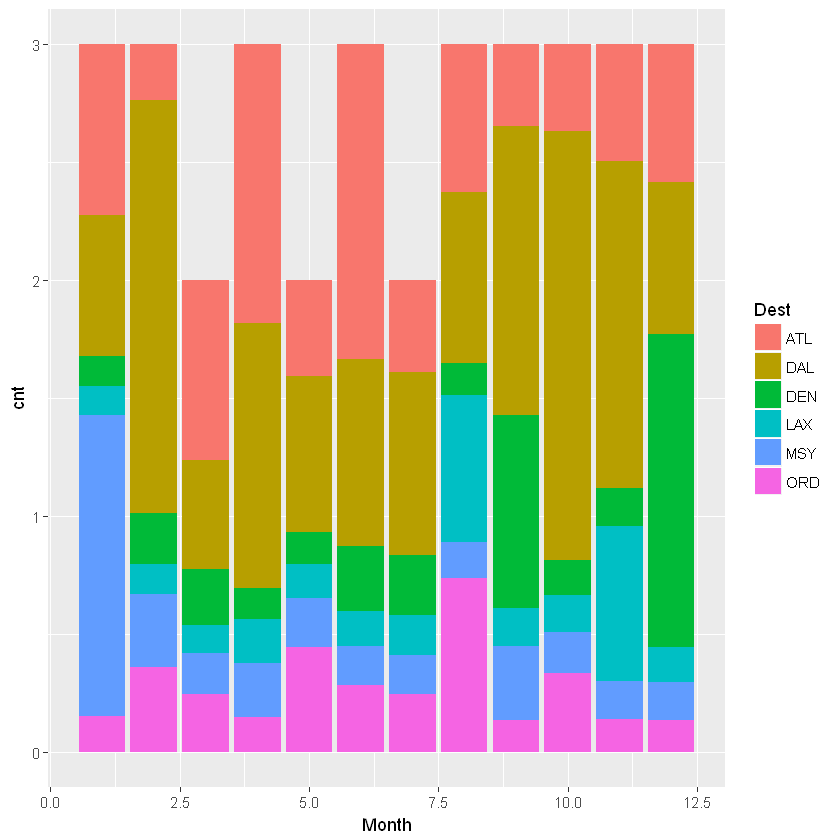

In [59]:
mm

Warning message:
"Removed 18 rows containing missing values (position_stack)."

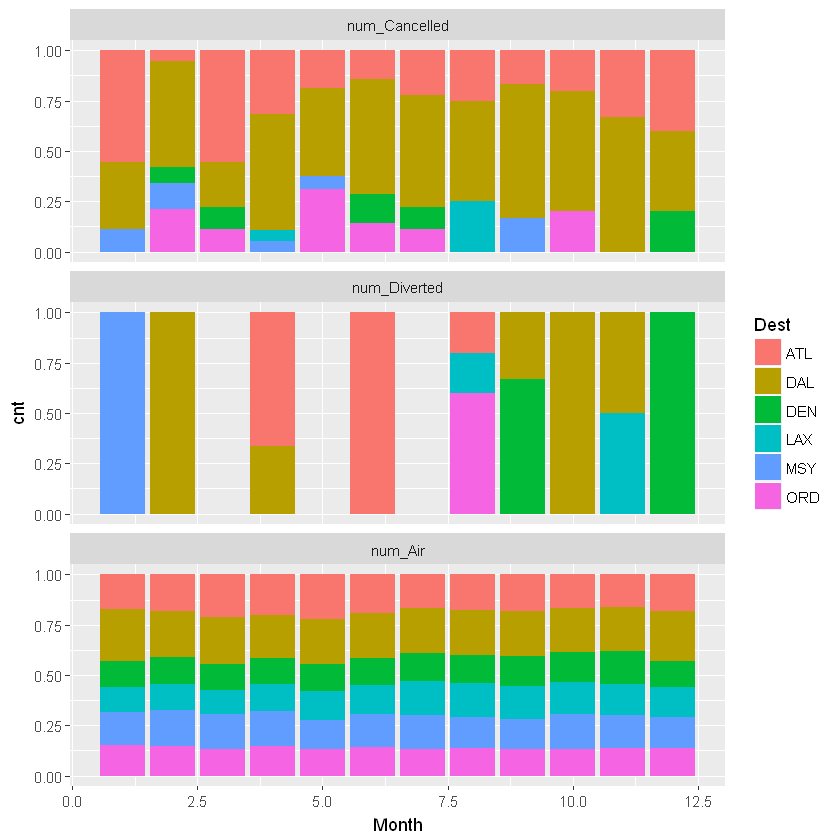

In [58]:
mm + facet_wrap(~ variable, nrow = 3)

1. 항공사별로 운항횟수를 구한 후에, 운항횟수에 대해서 내림차순으로 정렬
2. 상위 3개 데이터만 뽑아보기

In [61]:
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

In [77]:
flights.7 <-
hflights  %>% 
group_by(UniqueCarrier)  %>% 
summarise(air_count=n() - sum(Cancelled) - sum(Diverted))  %>% 
arrange(desc(air_count))  %>% 
head(3)

In [78]:
flights.7

UniqueCarrier,air_count
XE,71669
CO,69373
WN,44536


2. 1번째 결과를 사용해서 상위 3개 항공사에 대한 평균 도착 지연시간, 평균 출발지연시간을 구하기
소수점 셋째자리

In [91]:
flights.test.2 <-
hflights[hflights$UniqueCarrier == flights.7$UniqueCarrier,]  %>% 
group_by(UniqueCarrier)  %>% 
summarise(avg_ArrDelay = round(mean(ArrDelay, na.rm=T),3), 
          avg_DepDelay = round(mean(DepDelay, na.rm=T),3))

3.1 2번째 결과를 이용해서 평균 도착 지연 시간이 가장 긴 항공사에 대한 데이터를 추출

3.2 월별, 요일별 평균 도착지연시간과 평균 출발지연 시간을 출력

In [126]:
carrier <- flights.test.2  %>% 
arrange(desc(avg_ArrDelay))  %>% 
head(1)[1,1]

In [115]:
order(flights.test.2$avg_ArrDelay,decreasing = T)

[1] 3 2 1

In [144]:
flights.test.2[order(flights.test.2$avg_ArrDelay,decreasing = T)[1],]$UniqueCarrier

[1] "XE"

In [134]:
class(carrier <- flights.test.2  %>% 
arrange(desc(avg_ArrDelay))  %>% 
head(1)[1,1])

[1] "character"

In [145]:
hflights[hflights$UniqueCarrier == flights.test.2[order(flights.test.2$avg_ArrDelay,decreasing = T)[1],]$UniqueCarrier,]  %>% 
head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
453313,2011,1,31,1,1623,1913,XE,2008,N11184,110,...,-15,-7,IAH,JAX,817,4,15,0,,0
453314,2011,1,31,1,1325,1644,XE,2010,N13992,139,...,7,-8,IAH,SDF,788,4,35,0,,0
453318,2011,1,31,1,2110,2203,XE,2024,N13949,53,...,-8,0,IAH,BTR,253,6,11,0,,0
453319,2011,1,31,1,1511,1824,XE,2025,N11140,NA,...,NA,1,IAH,ABQ,744,5,23,0,,1
453320,2011,1,31,1,714,907,XE,2026,N11191,113,...,-16,-6,IAH,STL,668,6,14,0,,0
453323,2011,1,31,1,1101,1353,XE,2029,N14952,112,...,12,21,IAH,ATL,689,8,13,0,,0


In [127]:
hflights[hflights$UniqueCarrier == carrier,]  %>% 
head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
453313,2011,1,31,1,1623,1913,XE,2008,N11184,110,...,-15,-7,IAH,JAX,817,4,15,0,,0
453314,2011,1,31,1,1325,1644,XE,2010,N13992,139,...,7,-8,IAH,SDF,788,4,35,0,,0
453318,2011,1,31,1,2110,2203,XE,2024,N13949,53,...,-8,0,IAH,BTR,253,6,11,0,,0
453319,2011,1,31,1,1511,1824,XE,2025,N11140,NA,...,NA,1,IAH,ABQ,744,5,23,0,,1
453320,2011,1,31,1,714,907,XE,2026,N11191,113,...,-16,-6,IAH,STL,668,6,14,0,,0
453323,2011,1,31,1,1101,1353,XE,2029,N14952,112,...,12,21,IAH,ATL,689,8,13,0,,0


In [148]:
flights.test.3 <-
hflights[hflights$UniqueCarrier == flights.test.2[order(flights.test.2$avg_ArrDelay,decreasing = T)[1],]$UniqueCarrier,]  %>% 
group_by(Month, DayOfWeek)  %>% 
summarise(avg_ArrDelay = round(mean(ArrDelay, na.rm=T),3),
         avg_DepDely = round(mean(DepDelay, na.rm=T),3))

In [150]:
melt(flights.test.3, id=c("Month", "DayOfWeek"))

Month,DayOfWeek,variable,value
1,1,avg_ArrDelay,7.299
1,2,avg_ArrDelay,3.067
1,3,avg_ArrDelay,-2.655
1,4,avg_ArrDelay,5.711
1,5,avg_ArrDelay,0.005
1,6,avg_ArrDelay,2.191
1,7,avg_ArrDelay,6.739
2,1,avg_ArrDelay,4.968
2,2,avg_ArrDelay,4.352
2,3,avg_ArrDelay,6.612


In [157]:
melt.tmp <- melt(flights.test.3, id=1:2, na.rm=T)


In [155]:
dcast(melt.tmp, Month+DayOfWeek ~ variable)

Month,DayOfWeek,avg_ArrDelay,avg_DepDely
1,1,7.299,7.822
1,2,3.067,2.417
1,3,-2.655,-0.426
1,4,5.711,4.086
1,5,0.005,1.050
1,6,2.191,1.280
1,7,6.739,7.622
2,1,4.968,2.906
2,2,4.352,5.769
2,3,6.612,6.223


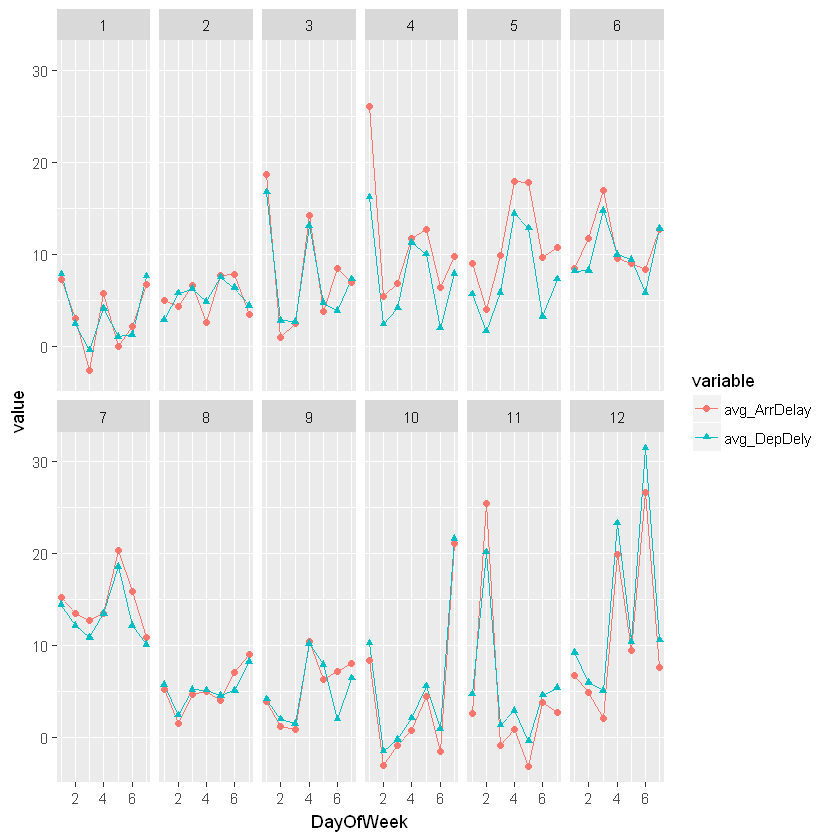

In [168]:
ggplot(melt.tmp, aes(x=DayOfWeek, y=value, group=variable, shape=variable, color=variable)) + geom_line() + geom_point()+ 
facet_wrap(~Month, nrow=2)

In [164]:
search()

[1] ".GlobalEnv"        "package:bindrcpp"  "package:reshape2" 
 [4] "package:ggplot2"   "package:dplyr"     "jupyter:irkernel" 
 [7] "package:RevoUtils" "package:stats"     "package:graphics" 
[10] "package:grDevices" "package:utils"     "package:datasets" 
[13] "package:methods"   "Autoloads"         "package:base"

In [169]:
getwd()

[1] "C:/Users/Playdata/lab/temp"